In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
# reading in LEIE_updated
leie_updated = pd.read_csv('s3://leie-updated/UPDATED.csv', dtype=object)

In [3]:
#Creating a new column with just the year, not looking at month and day
leie_updated['EXCLYear'] = leie_updated['EXCLDATE'].str[0:4]

In [4]:
#Checking new column added properly
leie_updated.head(5)

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE,EXCLYear
0,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,0000000000,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,19880830,00000000,00000000,NaN,1988
1,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,0000000000,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,19970620,00000000,00000000,NaN,1997
2,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,20180419,00000000,00000000,NaN,2018
3,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0000000000,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,20090319,00000000,00000000,NaN,2009
4,NaN,NaN,,"1ST COMMUNITY HEALTH CTR, LTD",CLINIC,NaN,NaN,0000000000,NaN,3138 W CERMAK ROAD,CHICAGO,IL,60623,1128a1,19940524,00000000,00000000,NaN,1994


In [5]:
print(leie_updated.dtypes)

LASTNAME      object
FIRSTNAME     object
MIDNAME       object
BUSNAME       object
GENERAL       object
SPECIALTY     object
UPIN          object
NPI           object
DOB           object
ADDRESS       object
CITY          object
STATE         object
ZIP           object
EXCLTYPE      object
EXCLDATE      object
REINDATE      object
WAIVERDATE    object
WVRSTATE      object
EXCLYear      object
dtype: object


In [6]:
#Need to convert some columns to numeric
leie_updated['NPI']=pd.to_numeric(leie_updated['NPI'])

In [7]:
#checking conversion was successful
print(leie_updated.dtypes)

LASTNAME      object
FIRSTNAME     object
MIDNAME       object
BUSNAME       object
GENERAL       object
SPECIALTY     object
UPIN          object
NPI            int64
DOB           object
ADDRESS       object
CITY          object
STATE         object
ZIP           object
EXCLTYPE      object
EXCLDATE      object
REINDATE      object
WAIVERDATE    object
WVRSTATE      object
EXCLYear      object
dtype: object


In [8]:
#Exploring the values for the first and last name fields
leie_updated['LASTNAME'].value_counts()

SMITH       594
JOHNSON     510
WILLIAMS    442
BROWN       424
JONES       411
           ... 
OROS          1
BURPO         1
WALSBURG      1
CAKNIPE       1
GELETKA       1
Name: LASTNAME, Length: 28296, dtype: int64

In [9]:
leie_updated['FIRSTNAME'].value_counts()

MICHAEL    877
JOHN       875
JAMES      829
ROBERT     828
DAVID      728
          ... 
TRINI        1
SARIS        1
CHALISA      1
FLORE        1
INCA         1
Name: FIRSTNAME, Length: 11218, dtype: int64

In [10]:
#Combining first and last to see if we have more unique names than NPI
leie_updated['Full_Name'] = leie_updated['FIRSTNAME'].str.cat(leie_updated['LASTNAME'],sep=" ")

In [11]:
leie_updated['Full_Name'].value_counts()

JAMES TAYLOR       11
JAMES BROWN        11
KAREN SMITH         9
KAREN WILSON        8
JAMES DAVIS         8
                   ..
JESSIE SIMMONS      1
STEPHEN PEACOCK     1
PETER BRINK         1
KATHRYN SLUSZKA     1
PATRICIA MCROY      1
Name: Full_Name, Length: 66323, dtype: int64

In [12]:
#Checking for another identifier field that has a relatively high number of unique values to add
leie_updated.nunique()

LASTNAME      28296
FIRSTNAME     11218
MIDNAME        8250
BUSNAME        3069
GENERAL          87
SPECIALTY       193
UPIN           6123
NPI            5277
DOB           20606
ADDRESS       68969
CITY           9789
STATE            60
ZIP           17179
EXCLTYPE         31
EXCLDATE       2274
REINDATE          1
WAIVERDATE       16
WVRSTATE         10
EXCLYear         44
Full_Name     66323
dtype: int64

In [13]:
#Adding in address as another identifier to create more unique incidences
leie_updated['Name_Address'] = leie_updated['Full_Name'].str.cat(leie_updated['ADDRESS'], sep=" ")

In [14]:
#Checking now the unique values for the new identifier field
leie_updated['Name_Address'].value_counts()

RAMON DOMINGUEZ P O BOX 019120, 57726-004    3
EUSEBIO HUERTA 1429 S W 139TH                3
CHARLES HARRIS P O BOX 5000, #44740-379      3
ALEXIS NORMAN P O BOX 27137, #49210-177      2
JEFFREY SKURATON 25 WINGED FOOT DR           2
                                            ..
CARL HALL 211 SKELLY DR                      1
TAMA EARLY 11201 E LAKE HIGHLAND DR          1
GEETI GOHARI 6902 TURNER AVENUE              1
SANDRA HUTCHINSON 234 SWAN ROAD              1
DAMION JAME 1800 S 330TH                     1
Name: Name_Address, Length: 69513, dtype: int64

It seems very unlikely for people with the exact same name to also have the exact same address so most likely means that there are duplicates in the data. Will need to explore these duplicates more before combining our data but first need to narrow down the timeframe of the data. Due to changes in the NPI policy, we will focus on 2008 and after for now.

In [15]:
#converting date EXCLDATE to numeric in order to filter and do calculations 
leie_updated['EXCLYear'] = pd.to_numeric(leie_updated['EXCLYear'])

In [16]:
#check conversion
print(leie_updated['EXCLYear'].dtypes)

int64


In [17]:
#filtering out all values prior to 2008
ge_2008 = leie_updated['EXCLYear'] > 2007
leie_2008 = leie_updated[ge_2008]

In [18]:
#confirm filtering worked and there is no date less than 2008
leie_2008['EXCLYear'].min()

2008

In [19]:
#Exploring filtered 2008 and after data
leie_2008.head(10)

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,...,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE,EXCLYear,Full_Name,Name_Address
2,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,...,NY,10468,1128a1,20180419,00000000,00000000,NaN,2018,NaN,NaN
3,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0,NaN,1951 FLATBUSH AVE,...,NY,11234,1128b5,20090319,00000000,00000000,NaN,2009,NaN,NaN
6,NaN,NaN,,2001 BATH AVENUE PHARMACY INC,OTHER BUSINESS,PHARMACY,NaN,0,NaN,2001 BATH AVENUE,...,NY,11214,1128a1,20110818,00000000,00000000,NaN,2011,NaN,NaN
11,NaN,NaN,,"716 TRANSPORTATION, INC",OTHER BUSINESS,TRANSPORTATION CO,NaN,0,NaN,540 VINE LANE,...,NY,14228,1128a1,20190620,00000000,00000000,NaN,2019,NaN,NaN
18,NaN,NaN,,A & H VITAMINS SUPPLY CORP,OTHER BUSINESS,PHARMACY,NaN,0,NaN,592 PALISADE AVENUE,...,NJ,07666,1128a1,20180419,00000000,00000000,NaN,2018,NaN,NaN
22,NaN,NaN,,"A & Y MEDICAL SUPPLY, INC",DME COMPANY,DME - GENERAL,NaN,1942476080,NaN,"6310 108TH STREET, APT 6J",...,NY,11375,1128b8,20170518,00000000,00000000,NaN,2017,NaN,NaN
26,NaN,NaN,,"A CARING ALTERNATIVE, INC",OTHER BUSINESS,HOME HEALTH AGENCY,NaN,1275600959,NaN,"1229 HURON RD E, FLR 6TH",...,OH,44115,1128a1,20130320,00000000,00000000,NaN,2013,NaN,NaN
29,NaN,NaN,,"A FAIR DEAL PHARMACY, INC",OTHER BUSINESS,PHARMACY,NaN,1891731758,NaN,"C/O P O BOX 329014, #69709-05",...,NY,11232,1128b8,20170518,00000000,00000000,NaN,2017,NaN,NaN
40,NaN,NaN,,"A SERVICE CAB CO, INC",OTHER BUSINESS,TRANSPORTATION CO,NaN,0,NaN,3704 AIRLINE DRIVE,...,LA,70001,1128a1,20170720,00000000,00000000,NaN,2017,NaN,NaN
45,NaN,NaN,,"AAA PLUS HOME HEALTH CARE, LLC",OTHER BUSINESS,HOME HEALTH AGENCY,NaN,0,NaN,6160 104TH CIRCLE NORTH,...,MN,55443,1128a1,20170620,00000000,00000000,NaN,2017,NaN,NaN


In [20]:
leie_2008.shape

(35885, 21)

In [21]:
leie_2008.nunique()

LASTNAME        16473
FIRSTNAME        7808
MIDNAME          5425
BUSNAME           669
GENERAL            67
SPECIALTY         172
UPIN             1738
NPI              5219
DOB             15492
ADDRESS         34660
CITY             6645
STATE              56
ZIP             12272
EXCLTYPE           28
EXCLDATE          395
REINDATE            1
WAIVERDATE         10
WVRSTATE            7
EXCLYear           13
Full_Name       34162
Name_Address    35103
dtype: int64

In [22]:
leie_2008.isnull().sum()

LASTNAME          678
FIRSTNAME         678
MIDNAME             0
BUSNAME         35209
GENERAL             0
SPECIALTY         563
UPIN            34115
NPI                 0
DOB               715
ADDRESS             0
CITY                0
STATE               3
ZIP                 0
EXCLTYPE            0
EXCLDATE            0
REINDATE            0
WAIVERDATE          0
WVRSTATE        35877
EXCLYear            0
Full_Name         680
Name_Address      680
dtype: int64

In [23]:
#Relooking at NPI values in filtered data
leie_2008['NPI'].value_counts()

0             30565
1801839139        3
1477594935        2
1356430557        2
1689757536        2
              ...  
1669678652        1
1265561161        1
1275534935        1
1124124268        1
1417033721        1
Name: NPI, Length: 5219, dtype: int64

By filtering to 2008 and after, we have cut down our number of rows almost in half (from 72,899 to 35,885). There are still 30,565 NPIs as 0 which is still 85% of our data. However, only 680 values (or 1.89%) of the full name and address are null so this may be a better connector between datasets. 

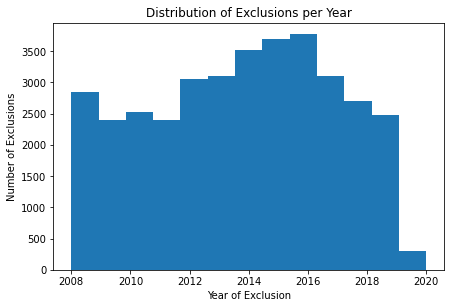

In [24]:
#Looking at distribution of the number of exclusions per year
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(211)
ax.hist(leie_2008['EXCLYear'], bins=13, range=(leie_2008['EXCLYear'].min(),leie_2008['EXCLYear'].max()))
plt.title('Distribution of Exclusions per Year')
plt.xlabel('Year of Exclusion')
plt.ylabel('Number of Exclusions')
plt.show()

In [25]:
#Looking at the number of 0 values for NPI per year
NPI_years = pd.pivot_table(leie_2008, 'EXCLDATE', index='NPI', columns ='EXCLYear', aggfunc='count')
NPI_years.head(10)

EXCLYear,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
NPI,,,,,,,,,,,,,
0,2787.0,2121.0,2211.0,2078.0,2692.0,2683.0,2967.0,3069.0,3109.0,2435.0,2197.0,1984.0,232.0
1003011644,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003016742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1003027665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1003040601,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1003042441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1003047879,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003049693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1003057910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


Confirmed there are many 0 values for NPI regardless of what year the exclusions took place so will need to rely on a combination of other identifiers, such as the full name and address, to connect across datasets. 

Now exploring these values more.

In [26]:
leie_2008['Name_Address'].value_counts()

CHARLES HARRIS P O BOX 5000, #44740-379          3
LUISA NIEVES 312 VILLA BORINQUEN, APT 312        2
ERIN TIPTON 129 JACK BANNER LANE                 2
JEFFREY EDWARDS 174 E COAST DR                   2
JOANIE BURGMAN 4411 NE 207TH COURT               2
                                                ..
JOHN VITALI 1 SHIRA LANE                         1
CARA PITTMAN 511 WEST COLT, APT B                1
ERNESTO PEREZ 1450 6TH STREET, SE                1
DARRYL DEMPSEY 5401 NAAMAN FOREST BLVD, APT 4    1
EMMA COLLIER 3301 CLIFF AVENUE                   1
Name: Name_Address, Length: 35103, dtype: int64

This doesn't give us all perfectly unique values and still some nulls so will need to look into how to properly combine various unique identifiers based on our what is available in our connecting dataset.

In [27]:
#looking at the values for exclusion type
leie_2008['EXCLTYPE'].value_counts()

1128b4       13870
1128a1       11856
1128a3        3073
1128a2        2721
1128a4        1788
1128a1         677
1128b5         403
1128b14        397
1128b1         351
1128b7         234
1128b8         222
1128a3          80
1128a2          64
1128b3          45
1128b2          23
1128b7          22
1128b15         17
BRCH SA          8
1128Aa           7
BRCH CIA         6
1128b6           6
1128b6           3
1156             3
1128b16          3
1128a4           2
1128b2           2
1128b1           1
1128b5           1
Name: EXCLTYPE, dtype: int64

In [28]:
#confirming that we see all of the unique values above so we can identify what they mean
leie_2008['EXCLTYPE'].nunique()

28

In [29]:
#Looking at the number of exclusion types per year
EXCLTYPE_years = pd.pivot_table(leie_2008, 'EXCLDATE', index='EXCLTYPE', columns ='EXCLYear', aggfunc='count')
EXCLTYPE_years.head(28)

EXCLYear,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
EXCLTYPE,,,,,,,,,,,,,
1128Aa,NaN,3.0,NaN,1.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
1128a1,607.0,660.0,720.0,890.0,891.0,1026.0,1260.0,1063.0,1355.0,1229.0,957.0,1094.0,104.0
1128a1,45.0,41.0,38.0,52.0,46.0,63.0,52.0,66.0,57.0,65.0,60.0,82.0,10.0
1128a2,220.0,231.0,206.0,190.0,205.0,152.0,219.0,289.0,278.0,253.0,210.0,227.0,41.0
1128a2,6.0,8.0,5.0,6.0,10.0,4.0,7.0,5.0,5.0,2.0,4.0,2.0,NaN
1128a3,194.0,241.0,200.0,194.0,272.0,268.0,327.0,322.0,239.0,240.0,228.0,294.0,54.0
1128a3,7.0,7.0,6.0,10.0,2.0,8.0,10.0,4.0,4.0,5.0,1.0,15.0,1.0
1128a4,163.0,123.0,121.0,111.0,97.0,158.0,146.0,191.0,153.0,187.0,131.0,180.0,27.0
1128a4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
